In [1]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict_ngp_on = {type: {} for type in types}
types_dict_ngp_off = {type: {} for type in types}
types_dict_nerfacto_on = {type: {} for type in types}
types_dict_nerfacto_off = {type: {} for type in types}


path_stump_ngp_on = r'C:\Stuff\Results\metrics\stump_ngp_opt_on_metrics.npy'
path_stump_ngp_off = r'C:\Stuff\Results\metrics\stump_ngp_opt_off_metrics.npy'
path_stump_nerfacto_on = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_on_metrics.npy'
path_stump_nerfacto_off = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_off_metrics.npy'

ngp_on = np.load(path_stump_ngp_on, allow_pickle=True).item()
ngp_off = np.load(path_stump_ngp_off, allow_pickle=True).item()
nerfacto_on = np.load(path_stump_nerfacto_on, allow_pickle=True).item()
nerfacto_off = np.load(path_stump_nerfacto_off, allow_pickle=True).item()

for k,v in ngp_on.items():
    for type in types:
        if type in k:
            types_dict_ngp_on[type][k] = v

for k,v in ngp_off.items():
    for type in types:
        if type in k:
            types_dict_ngp_off[type][k] = v

for k,v in nerfacto_on.items():
    if 'stump-orient-std' in k:
        k = k.replace('stump-orient-std', 'stump-orientation-std')
    elif 'stump-pos-std' in k:
        k = k.replace('stump-pos-std', 'stump-position-std')
    for type in types:
        if type in k:
            types_dict_nerfacto_on[type][k] = v

for k,v in nerfacto_off.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_off[type][k] = v                                

benchmark_psnr_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['PSNR']
benchmark_ssim_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['SSIM']
benchmark_lpips_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['LPIPS']

benchmark_psnr_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['PSNR']
benchmark_ssim_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['SSIM']
benchmark_lpips_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['LPIPS']

benchmarks_psnr = [benchmark_psnr_ngp_on, benchmark_psnr_ngp_off, benchmark_psnr_nerfacto_on, benchmark_psnr_nerfacto_off]
benchmarks_ssim = [benchmark_ssim_ngp_on, benchmark_ssim_ngp_off, benchmark_ssim_nerfacto_on, benchmark_ssim_nerfacto_off]
benchmarks_lpips = [benchmark_lpips_ngp_on, benchmark_lpips_ngp_off, benchmark_lpips_nerfacto_on, benchmark_lpips_nerfacto_off]


In [2]:
psnr_heatmap_dict_ngp_on = {}
psnr_heatmap_dict_ngp_off = {}
psnr_heatmap_dict_nerfacto_on = {}
psnr_heatmap_dict_nerfacto_off = {}

ssim_heatmap_dict_ngp_on = {}
ssim_heatmap_dict_ngp_off = {}
ssim_heatmap_dict_nerfacto_on = {}
ssim_heatmap_dict_nerfacto_off = {}

lpips_heatmap_dict_ngp_on = {}
lpips_heatmap_dict_ngp_off = {}
lpips_heatmap_dict_nerfacto_on = {}
lpips_heatmap_dict_nerfacto_off = {}

for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_on[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_on[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_on[type] = rel_change_lpips


for type, metrics in types_dict_ngp_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_ngp_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_ngp_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_ngp_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_ngp_off[type] = rel_change_psnr
    ssim_heatmap_dict_ngp_off[type] = rel_change_ssim
    lpips_heatmap_dict_ngp_off[type] = rel_change_lpips

for type, metrics in types_dict_nerfacto_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_on)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_on)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_on)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_on[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_on[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_on[type] = rel_change_lpips 

for type, metrics in types_dict_nerfacto_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    mean_last_psnr = np.mean(sorted_psnrs[-1])
    mean_last_ssim = np.mean(sorted_ssims[-1])
    mean_last_lpips = np.mean(sorted_lpips[-1])

    mean_benchmark_psnr = np.mean(benchmark_psnr_nerfacto_off)
    mean_benchmark_ssim = np.mean(benchmark_ssim_nerfacto_off)
    mean_benchmark_lpips = np.mean(benchmark_lpips_nerfacto_off)

    diff_psnr = mean_benchmark_psnr - mean_last_psnr
    diff_ssim = mean_benchmark_ssim - mean_last_ssim
    diff_lpips = mean_benchmark_lpips - mean_last_lpips

    rel_change_psnr = diff_psnr / mean_benchmark_psnr * 100
    rel_change_ssim = diff_ssim / mean_benchmark_ssim * 100
    rel_change_lpips = diff_lpips / mean_benchmark_lpips * -100

    psnr_heatmap_dict_nerfacto_off[type] = rel_change_psnr
    ssim_heatmap_dict_nerfacto_off[type] = rel_change_ssim
    lpips_heatmap_dict_nerfacto_off[type] = rel_change_lpips  

In [3]:
benchmark = 'Original'
red_pns = 'Red channel PnS Noise'
blue_pns = 'Blue channel PnS Noise'
green_pns = 'Green channel PnS Noise'
noise= 'Image Noise'
rot_noise = 'Pose Noise Rotation'
trans_noise = 'Pose Noise Translation'
combined_noise = 'Pose Noise Combined'
satur = 'Saturation Change'
gamma = 'Gamma Correction'
sparce = 'Reduced Image Set'
height = 'Height Rduction'

labels = (combined_noise, rot_noise, sparce, height, noise, gamma, trans_noise, red_pns, green_pns, blue_pns, satur, benchmark)

In [4]:
psnr_heatmap_dict_ngp_on

appearnace = {}
appearnace['gamma'] = psnr_heatmap_dict_ngp_on['gamma']
appearnace['saturation'] = psnr_heatmap_dict_ngp_on['saturation']

noises = {}
noises['noise-std'] = psnr_heatmap_dict_ngp_on['noise-std']
noises['blue-noise'] = psnr_heatmap_dict_ngp_on['blue-noise']
noises['red-noise'] = psnr_heatmap_dict_ngp_on['red-noise']
noises['green-noise'] = psnr_heatmap_dict_ngp_on['green-noise']

pose_noises = {}
pose_noises['position'] = psnr_heatmap_dict_ngp_on['position']
pose_noises['orientation'] = psnr_heatmap_dict_ngp_on['orientation']
pose_noises['pos-orient'] = psnr_heatmap_dict_ngp_on['pos-orient']

reductions = {}
reductions['range'] = psnr_heatmap_dict_ngp_on['range']
reductions['every'] = psnr_heatmap_dict_ngp_on['every']

In [24]:
len(reductions)

2

In [8]:
psnr_heatmap_dict_ngp_on

{'benchmark': 0.0,
 'every': 7.8704992493259,
 'gamma': 1.1521845762905734,
 'noise-std': 15.56034410666303,
 'orientation': 26.593500837476775,
 'blue-noise': 13.879346498324526,
 'green-noise': 14.262033683045233,
 'red-noise': 16.047028128945716,
 'pos-orient': 39.602154365645056,
 'position': 15.978777751984252,
 'range': 40.04262323879768,
 'saturation': 0.8292385749113184}

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a new figure for the adjusted heatmaps
fig, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw={'width_ratios': [2, 4, 3, 2]})

# Function to draw each heatmap with a shared normalization but without adding a colorbar directly
def draw_heatmap_with_shared_cbar(data, ax, title):
    sns.heatmap(data, ax=ax, square=True, annot=True, cbar = False)
    ax.set_title(title)

# Drawing the heatmaps
draw_heatmap_with_shared_cbar(data_cluster_1, axs[0], "Cluster 1")
draw_heatmap_with_shared_cbar(data_cluster_2, axs[1], "Cluster 2")
draw_heatmap_with_shared_cbar(data_cluster_3, axs[2], "Cluster 3")

# Adding a single shared colorbar to the right of the last plot
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

plt.show()

ValueError: Expected the given number of width ratios to match the number of columns of the grid

<Figure size 1800x500 with 0 Axes>

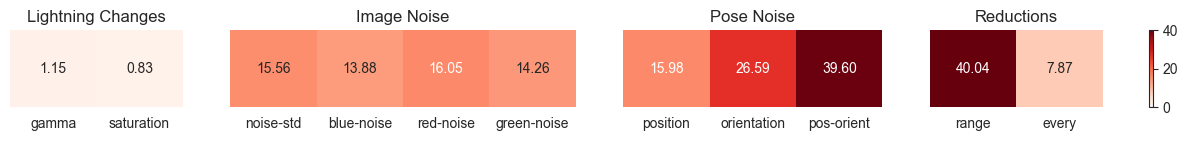

In [7]:
def plot_adjusted_heatmaps(dict_clusters, cluster_names):
    fig, axs = plt.subplots(1, len(dict_clusters), gridspec_kw={'width_ratios': [len(cluster) for cluster in dict_clusters]}, figsize=(15, 1))

    for ax, cluster_dict, name in zip(axs, dict_clusters, cluster_names):
        # Converting each dict to a 2D array of 1 row
        data = np.array(list(cluster_dict.values())).reshape(1, -1)
        sns.heatmap(data, ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax = 40, fmt=".2f")
        ax.set_xticklabels(cluster_dict.keys())
        ax.set_yticks([])  # Disabling y-ticks

        ax.set_title(name)  # Adding cluster name as title
        
    # Adding a shared colorbar
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
    sns.set_style("white")



    plt.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

    save_dir = r'C:\Stuff\Results\plots'
    plt.savefig(os.path.join(save_dir, f'heatmap_one_row_stump_ngp_on.pdf'), format='pdf', dpi=300)

    plt.show()

# Plotting the adjusted heatmaps
plot_adjusted_heatmaps([appearnace, noises, pose_noises, reductions], ["Lightning Changes", "Image Noise", "Pose Noise", "Reductions"])


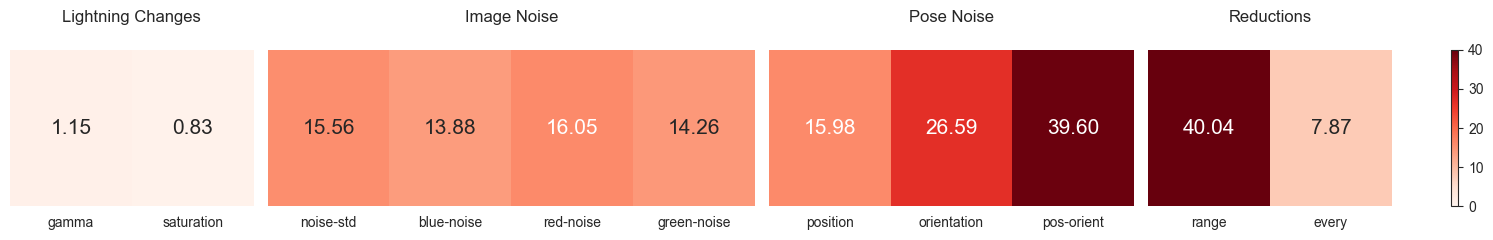

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_adjusted_heatmaps(dict_clusters, cluster_names):
    fig, axs = plt.subplots(1, len(dict_clusters), gridspec_kw={'width_ratios': [len(cluster) for cluster in dict_clusters]}, figsize=(15, 2.5))  # Adjust figsize as needed

    for ax, cluster_dict, name in zip(axs, dict_clusters, cluster_names):
        # Converting each dict to a 2D array of 1 row
        data = np.array(list(cluster_dict.values())).reshape(1, -1)
        sns.heatmap(data, ax=ax, annot=True, cmap="Reds", cbar=False, vmin=0, vmax=40, fmt=".2f", annot_kws={"size": 15})  # Adjust 'size' as needed
        ax.set_xticklabels(cluster_dict.keys())  # Adjust rotation for better visibility
        ax.set_yticks([])  # Disabling y-ticks

        ax.set_title(name, pad=20)  # Adding cluster name as title, adjust pad for spacing

    # Adjust layout to make sure titles and labels are visible
    plt.tight_layout()

    # Adding a shared colorbar
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=40))
    plt.colorbar(sm, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

    save_dir = r'C:\Stuff\Results\plots'
    plt.savefig(os.path.join(save_dir, 'heatmap_one_row_stump_ngp_on.pdf'), format='pdf', dpi=300, bbox_inches='tight')  # Add bbox_inches='tight' to ensure all content fits

    plt.show()

# Example usage (ensure your cluster dictionaries are correctly defined before calling)
plot_adjusted_heatmaps([appearnace, noises, pose_noises, reductions], ["Lightning Changes", "Image Noise", "Pose Noise", "Reductions"])
